In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [6]:
x=np.linspace(-10,10,50)#Creamos un espacio de intervalo uniforme
y=2*x**2 +3*x +5*np.random.normal(0,4,size=len(x)) #Lo ajustamos a una funcion para una distribucion especial de los datos
print(x)


[-10.          -9.59183673  -9.18367347  -8.7755102   -8.36734694
  -7.95918367  -7.55102041  -7.14285714  -6.73469388  -6.32653061
  -5.91836735  -5.51020408  -5.10204082  -4.69387755  -4.28571429
  -3.87755102  -3.46938776  -3.06122449  -2.65306122  -2.24489796
  -1.83673469  -1.42857143  -1.02040816  -0.6122449   -0.20408163
   0.20408163   0.6122449    1.02040816   1.42857143   1.83673469
   2.24489796   2.65306122   3.06122449   3.46938776   3.87755102
   4.28571429   4.69387755   5.10204082   5.51020408   5.91836735
   6.32653061   6.73469388   7.14285714   7.55102041   7.95918367
   8.36734694   8.7755102    9.18367347   9.59183673  10.        ]


In [6]:
print(y)

[193.14265687 138.61541711 167.1132375  153.59657797  97.59655145
  79.51250531  63.20301986  71.01851511  55.98119276  48.39592118
  65.76115033  14.60536726  38.84563054  12.77630996  13.25799135
  25.06942491  20.66390324  22.09433149  26.97454893  14.61167589
  15.5061869    7.51975827  -5.18053599  -5.43785128   4.61236939
 -23.62194031  -3.20594392  13.34119433  21.84476302   1.61416581
  17.67888664   8.23424087  34.3925293   40.12360914  79.81517686
  81.39042174  55.32277163  59.34934857  66.12233479  89.94514418
  90.32235345 114.27902816 152.29239907 141.2727897  165.41760618
 133.42153695 162.46956951 164.58379193 275.35667291 260.26564553]


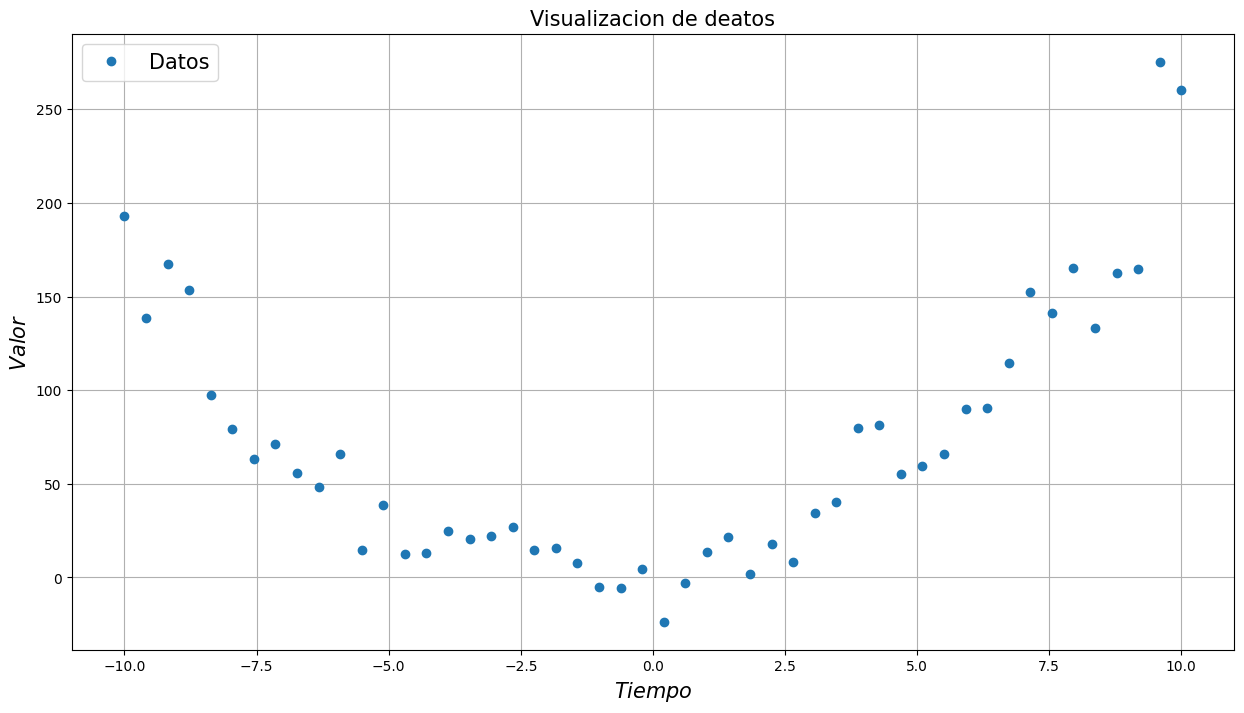

In [7]:
plt.figure(figsize=(15,8))
plt.title("Visualizacion de deatos",fontsize=15)
plt.plot(x,y,'o')
plt.legend(["Datos"],fontsize=15)
plt.xlabel("$Tiempo$",fontsize=15)
plt.ylabel("$Valor$",fontsize=15)#Graficamos como quedaron los datos
plt.grid()
plt.show()

In [8]:
model=keras.Sequential(keras.layers.Dense(units=1,input_shape=(1,)))#Usamos un perceptron simple
model.compile(optimizer='sgd',loss="mean_squared_error")#Usamos el descenso de gradiente estocástico y el error cuadrado medio
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)#Aquí quise imprimir pero no pude instalar la libreria que pide

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [19]:
model.fit(x,y,epochs=1)#Hacemos fit de los datos en una sola epoca



2/2 [==============================] - 1s 12ms/step - loss: 9567.7910


In [21]:
w=model.get_weights()
print(w)
print("\nObjeto Pesos:" , w)
print("Number of weights "+str(len(w)))
print("\nw= "+ str(w[0][0])+"(Weight)")
print("b = "+str(w[1])+" Weight->bias")


[array([[2.3256783]], dtype=float32), array([2.9065742], dtype=float32)]

Objeto Pesos: [array([[2.3256783]], dtype=float32), array([2.9065742], dtype=float32)]
Number of weights 2

w= [2.3256783](Weight)
b = [2.9065742] Weight->bias


In [22]:
predict=model.predict(x)#Predecimos valores a lo largo de nuestro espacio


2/2 [==============================] - 0s 8ms/step


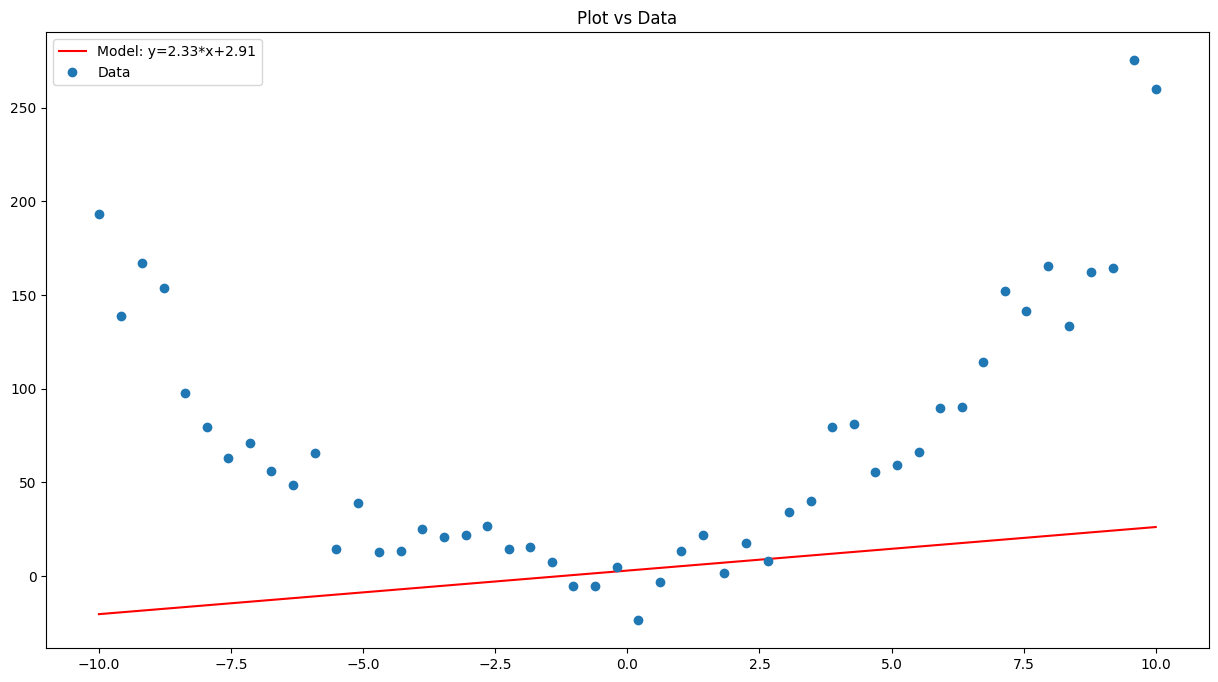

In [25]:
plt.figure(figsize=(15,8))
plt.plot(x,predict,'r-',label="Model: y={:.2f}*x+{:.2f}".format(w[0].item(),w[1].item()))
plt.plot(x,y,'o',label="Data")
plt.title("Plot vs Data")
plt.legend(loc=0)
plt.show()#Se produce una linea recta ya que es un perceptrón simple

In [5]:
model2=tf.keras.Sequential([#Hacemos una red densa de 3 capas con varias neuronas por capa
    keras.layers.Dense(units=5,input_shape=(1,),activation='softplus'),
    keras.layers.Dense(units=10,activation='softplus'),
    keras.layers.Dense(units=20,activation='softplus'),
    keras.layers.Dense(units=1)#Al final una neurona de salida que nos va a decir su valor
    
])
model2.compile(optimizer='adam',loss='mean_squared_error')#Compilamos con optimizador adam y perdida de error cuadrado medio
model2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 5)                 10        
                                                                 
 dense_5 (Dense)             (None, 10)                60        
                                                                 
 dense_6 (Dense)             (None, 20)                220       
                                                                 
 dense_7 (Dense)             (None, 1)                 21        
                                                                 
Total params: 311 (1.21 KB)
Trainable params: 311 (1.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
history=model2.fit(x,y,epochs=1000,verbose=0)#Entrenamos el modelo y guardamos el historial
w2=model2.get_weights()
print(w2)
print("\nObjeto Pesos:" , w2)
print("Number of weights "+str(len(w2)))
print("\nw= "+ str(w2[0][0])+"(Weight)")
print("b = "+str(w2[1])+" Weight->bias")


[array([[ 1.3338189 ,  0.6629201 , -0.871378  ,  0.12531422,  0.7461044 ]],
      dtype=float32), array([-0.71062803, -0.63624513, -0.68012977,  0.59282464, -0.65667075],
      dtype=float32), array([[ 5.7152200e-01,  2.9911894e-01,  7.2571790e-01, -8.6223441e-01,
         6.2254465e-01,  2.0378467e-01,  4.4080794e-01,  7.4119920e-01,
         9.2869663e-01,  3.3875173e-01],
       [-2.5736108e-01,  4.9685785e-01, -1.4359470e-01, -1.6573907e+00,
         6.6334826e-01,  3.4288684e-01,  1.6883299e-01,  8.6399496e-01,
         6.9997954e-01,  7.5821930e-01],
       [-1.3527634e-03, -1.1842750e+00,  7.9700005e-01,  1.0685147e+00,
         8.5748124e-01,  6.8467367e-01,  9.7227919e-01,  4.9075076e-01,
         9.5537132e-01,  1.1922172e+00],
       [ 7.0217729e-01, -3.0800918e-01, -4.4351789e-01, -2.3122265e+00,
        -3.6287016e-01,  2.5649229e-01,  6.2310189e-01,  1.4373966e-01,
        -5.9533286e-01, -3.2017720e-01],
       [ 1.5299378e-01,  3.0934644e-01,  5.4134125e-01, -1.9069818

10/10 [==============================] - 0s 3ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

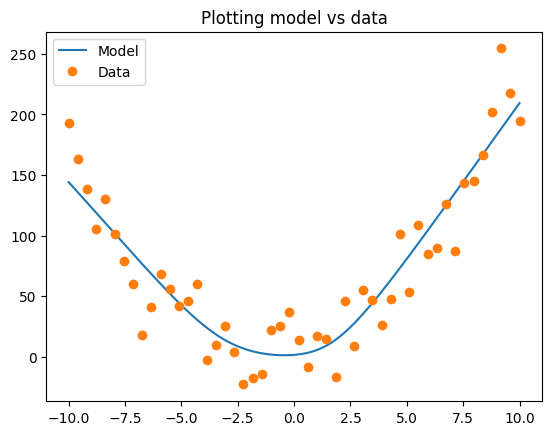

In [9]:
x_test=np.linspace(x[0],x[-1],300) #Hacemos un espacio uniforme de prueba
predict=model2.predict(x_test)
plt.plot(x_test,predict,label="Model")
plt.plot(x,y,'o',label="Data")
plt.title("Plotting model vs data")#Graficamos como quedó la predicción respecto a los datos
plt.legend(loc=0)
plt.show

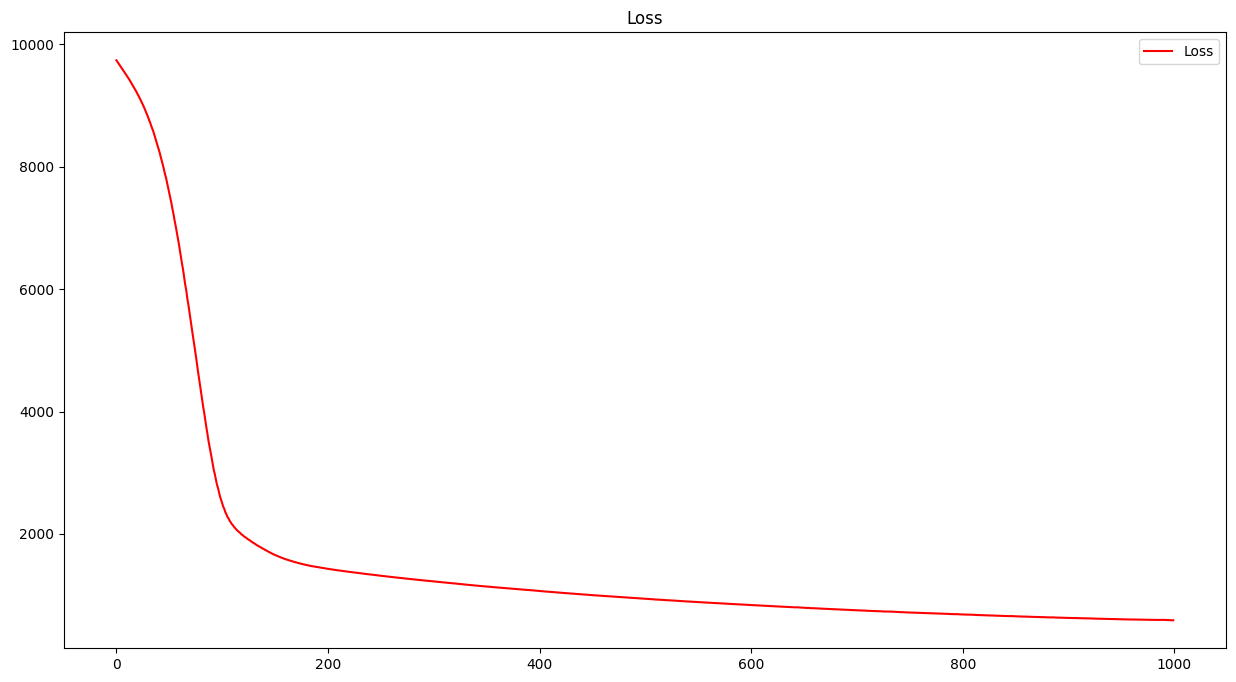

In [10]:
plt.figure(figsize=(15,8))
plt.plot(history.history["loss"],"r-",label="Loss")#Graficamos la perdida del modelo a lo largo de las epocas
plt.title("Loss")
plt.legend(loc=0)
plt.show()